# Mia's solution for exercise 2.11 


## Exercise 2.1

If you are pregnant with your first child, you might have heard that first babies are more likely to be late. As it turns out, it is true, but the difference is not that big from analyzing the mean and effect size of pregnancy length.

Based on live births recorded in the National Survey of Family Growth:
the difference of mean between pregnancy length on first babies and others babies is only about 0.078. The first babies tend to have longer pregnancy lengh of 38.6 weeks compare to 38.52 weeks of others babies.  

If we look into Cohent Effect Size, the difference in means is 0.029 standard deviations, which is small. To put that in perspective, the difference in height between men and women is about 1.7 standard deviations.

## Exercise 2.2 (chap02ex.ipynb)

In [9]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [10]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [11]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [12]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [13]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [4]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [5]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [6]:
hist[4]

0

The `Values` method returns the values:

In [7]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [14]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [15]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

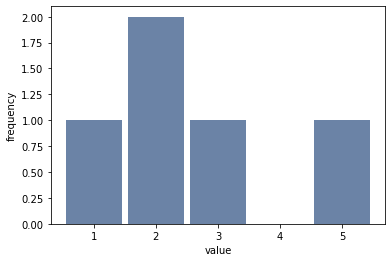

In [16]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [93]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

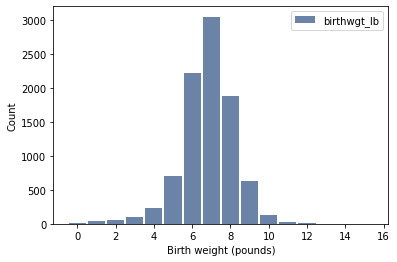

In [18]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [19]:
ages = np.floor(live.agepreg)

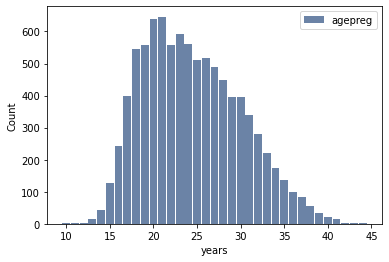

In [20]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

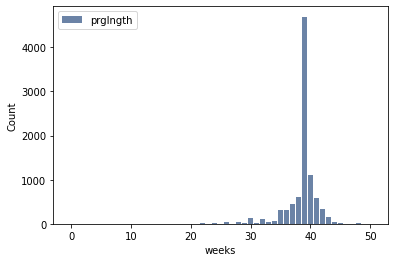

In [21]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [22]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [23]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [24]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

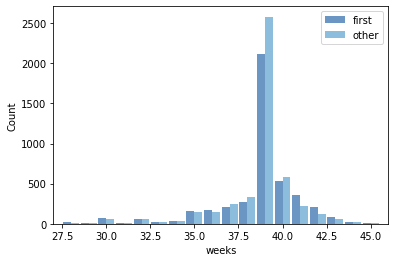

In [25]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [26]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [27]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [28]:
np.sqrt(var) == std

True

Here's are the mean pregnancy lengths for first babies and others:

In [29]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [30]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [46]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [47]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [33]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [34]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

For the next few exercises, we'll load the respondent file:

In [110]:
resp = nsfg.ReadFemResp()
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

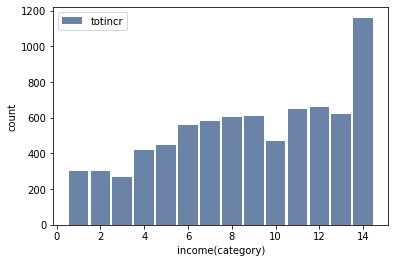

In [36]:
hist = thinkstats2.Hist(resp.totincr, label = "totincr")
thinkplot.Hist(hist)
thinkplot.Config(xlabel = "income(category)", ylabel = "count")

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

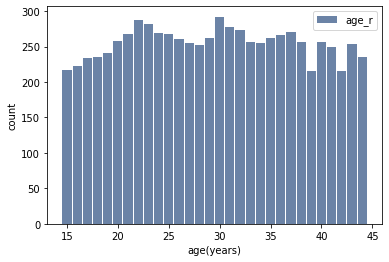

In [37]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label = "age_r")
thinkplot.Config(xlabel = "age(years)", ylabel = "count")

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

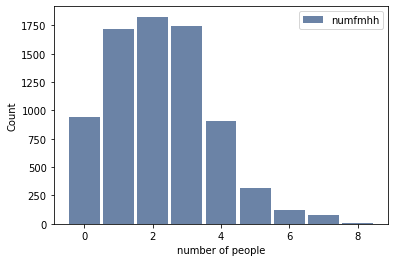

In [61]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label = "numfmhh")
thinkplot.Config(xlabel = "number of respondent", ylabel = "Count")

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

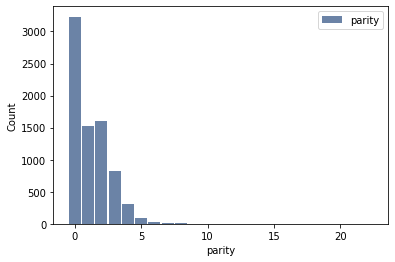

In [53]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label = "parity")
thinkplot.Config(xlabel = "parity", ylabel = "Count")

Ans: From above histogram, we can see this distribution is positively(right) skewed.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [59]:
for parity, count in hist.Largest(10):
    print(parity, ":", count)

22 : 1
16 : 1
10 : 3
9 : 2
8 : 8
7 : 15
6 : 29
5 : 95
4 : 309
3 : 828


Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

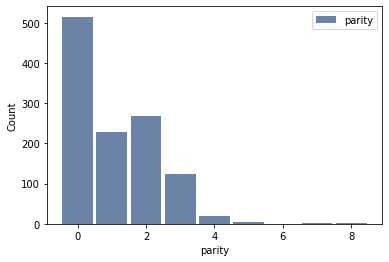

In [63]:
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label="parity")
thinkplot.Config(xlabel="parity", ylabel="Count")

Find the largest parities for high income respondents.

In [65]:
for parity, count in hist.Largest(10):
    print(parity, ":", count)

8 : 1
7 : 1
5 : 5
4 : 19
3 : 123
2 : 267
1 : 229
0 : 515


Compare the mean <tt>parity</tt> for high income respondents and others.

In [44]:
not_rich = resp[resp.totincr < 14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [48]:
CohenEffectSize(rich.parity, not_rich.parity)

-0.1251185531466061

In [130]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

Ans: From above comparison (-0.125 & 0.0289), we can see this effect is about 10 times stronger than the difference in pregnancy length.

## Exercise 2.3

Write a function called Mode that takes a Hist and returns the most frequent value. As a more challenging exercise, write a function called AllModes that returns a list of value-frequency pairs in descending order of frequency.

In [122]:
from __future__ import print_function

import sys
from operator import itemgetter

import first
import thinkstats2


def Mode(hist):
    # Store the max val, freq pair
    maxPair = (None, -1)
    for val, freq in hist.Items():
        if (freq > maxPair[1]):
            maxPair = (val, freq)
            
    return maxPair[0]


def AllModes(hist):
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)

def main():
    
    """Tests the functions in this module.

    script: string script name
    """
    live, firsts, others = first.MakeFrames()
    hist = thinkstats2.Hist(live.prglngth)

    # test Mode    
    mode = Mode(hist)
    print('Mode of preg length', mode)
    assert mode == 39, mode

    # test AllModes
    modes = AllModes(hist)
    assert modes[0][1] == 4693, modes[0][1]

    for val, freq in modes[:5]:
        print(val, freq)


if __name__ == '__main__':
    main()

Mode of preg length 39
39 4693
40 1116
38 607
41 587
37 455


## Exercise 2.4 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups.

In [126]:
def WeightDifference(live, firsts, others):
        
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print("Mean as below.")
    print("First babies: ", mean1)
    print("Others: ", mean2)

    print("Variance as below.")
    print("First babies: ", var1)
    print("Others: ", var2)

    print("Difference in lbs: ", mean1 - mean2)
    print("Difference in oz: ", (mean1 - mean2) * 16)

    print("Difference of mean (%age points): ", 
          (mean1 - mean2) / mean0 * 100)

    d_babywgt = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print("Cohen Effect Size on first babies and others babies: ", d_babywgt)

live, firsts, others = first.MakeFrames()
WeightDifference(live, firsts, others)

Mean as below.
First babies:  7.201094430437772
Others:  7.325855614973262
Variance as below.
First babies:  2.0180273009157768
Others:  1.9437810258964572
Difference in lbs:  -0.12476118453549034
Difference in oz:  -1.9961789525678455
Difference of mean (%age points):  -1.7171423678372415
Cohen Effect Size on first babies and others babies:  -0.088672927072602


How does Cohen’s d of total weight compare to the difference in pregnancy length on first babies and others babies?

In [131]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883